In [1]:
import torch
import torch.nn as nn
import torchaudio

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

!pip install mido
from mido import Message, MidiFile, MidiTrack, MetaMessage
import IPython.display as ipd

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.origin'] = 'lower'

Defaulting to user installation because normal site-packages is not writeable


In [55]:
!gdown 1HVyypKAHnqYLBHb7z8U0A_A7Xs-WsIEm

Downloading...
From: https://drive.google.com/uc?id=1HVyypKAHnqYLBHb7z8U0A_A7Xs-WsIEm
To: /home/teo/userdata/sg-ant-5015/ant5015-2022Spring/small_maestro.zip
 49%|██████████████████▌                   | 1.45G/2.97G [02:58<03:02, 8.34MB/s]^C
Traceback (most recent call last):
  File "/home/teo/.local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/home/teo/.local/lib/python3.8/site-packages/gdown/cli.py", line 156, in main
    filename = download(
  File "/home/teo/.local/lib/python3.8/site-packages/gdown/download.py", line 260, in download
    pbar.update(len(chunk))
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1241, in update
    self.refresh(lock_args=self.lock_args)
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1346, in refresh
    self.display()
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1494, in display
    self.sp(self.__str__() if msg is None else msg)
  File "/usr/local/lib/python3.8/dist-packages/tqd

In [ ]:
!unzip -q small_maestro.zip

In [6]:
data_dir = Path('../small_maestro')

In [6]:
csv_path = data_dir / 'small_maestro.csv'
df = pd.read_csv(csv_path)
df

,Unnamed: 0,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,766,Johann Sebastian Bach,"Prelude and Fugue in C Major, WTC II, BWV 870",train,2015,2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-f...,2015/MIDI-Unprocessed_R1_D2-13-20_mid--AUDIO-f...,258.543750
1,376,Franz Schubert,"Sonata in A Major, D. 959 (Complete)",train,2014,2014/MIDI-UNPROCESSED_19-20-21_R2_2014_MID--AU...,2014/MIDI-UNPROCESSED_19-20-21_R2_2014_MID--AU...,2453.078476
2,20,Alexander Scriabin,"Sonata No. 2 in G-sharp Minor, Op. 19 (Complete)",train,2017,2017/MIDI-Unprocessed_079_PIANO079_MID--AUDIO-...,2017/MIDI-Unprocessed_079_PIANO079_MID--AUDIO-...,661.909150
3,883,Johannes Brahms,Sonata Op. 5,train,2006,2006/MIDI-Unprocessed_12_R1_2006_01-08_ORIG_MI...,2006/MIDI-Unprocessed_12_R1_2006_01-08_ORIG_MI...,2008.693237
4,443,Franz Schubert,"Sonata in C Minor, D958",train,2018,2018/MIDI-Unprocessed_Schubert1-3_MID--AUDIO_0...,2018/MIDI-Unprocessed_Schubert1-3_MID--AUDIO_0...,1743.525233
...,...,...,...,...,...,...,...,...
79,120,Domenico Scarlatti,"Sonata, K239",test,2004,2004/MIDI-Unprocessed_XP_04_R1_2004_03-05_ORIG...,2004/MIDI-Unprocessed_XP_04_R1_2004_03-05_ORIG...,196.015447
80,72,Claude Debussy,Pour le piano (Complete),test,2015,2015/MIDI-Unprocessed_R2_D2-12-13-15_mid--AUDI...,2015/MIDI-Unprocessed_R2_D2-12-13-15_mid--AUDI...,738.958333
81,316,Franz Schubert,"Impromptu Op. 142 No. 4, in F Minor, D935",test,2011,2011/MIDI-Unprocessed_02_R2_2011_MID--AUDIO_R2...,2011/MIDI-Unprocessed_02_R2_2011_MID--AUDIO_R2...,329.194382
82,268,Franz Liszt,"Transcendental Etude No. 8 ""Wilde Jagd""",test,2013,2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_...,2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_...,317.551766


In [11]:
df.loc[df['split']=='test']

,Unnamed: 0,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
74,104,Domenico Scarlatti,"Sonata in D Major, K. 118",test,2014,2014/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO...,2014/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO...,136.679885
75,1270,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,245.315516
76,378,Franz Schubert,"Sonata in A Major, Op. 120, I. Allegro moderato",test,2013,2013/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_12_...,2013/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_12_...,339.792662
77,1246,Wolfgang Amadeus Mozart,"Sonata in B-flat Major, K. 333, 1st mov.",test,2013,2013/ORIG-MIDI_03_7_10_13_Group_MID--AUDIO_17_...,2013/ORIG-MIDI_03_7_10_13_Group_MID--AUDIO_17_...,307.326082
78,823,Johann Sebastian Bach,"Prelude and Fugue in F-sharp Major, WTC I, BWV...",test,2011,2011/MIDI-Unprocessed_07_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_07_R1_2011_MID--AUDIO_R1...,219.032901
79,120,Domenico Scarlatti,"Sonata, K239",test,2004,2004/MIDI-Unprocessed_XP_04_R1_2004_03-05_ORIG...,2004/MIDI-Unprocessed_XP_04_R1_2004_03-05_ORIG...,196.015447
80,72,Claude Debussy,Pour le piano (Complete),test,2015,2015/MIDI-Unprocessed_R2_D2-12-13-15_mid--AUDI...,2015/MIDI-Unprocessed_R2_D2-12-13-15_mid--AUDI...,738.958333
81,316,Franz Schubert,"Impromptu Op. 142 No. 4, in F Minor, D935",test,2011,2011/MIDI-Unprocessed_02_R2_2011_MID--AUDIO_R2...,2011/MIDI-Unprocessed_02_R2_2011_MID--AUDIO_R2...,329.194382
82,268,Franz Liszt,"Transcendental Etude No. 8 ""Wilde Jagd""",test,2013,2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_...,2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_...,317.551766
83,947,Ludwig van Beethoven,"Sonata No. 10 in G Major, Op. 14 No. 2, First ...",test,2011,2011/MIDI-Unprocessed_09_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_09_R1_2011_MID--AUDIO_R1...,278.940693


In [15]:
audio_fn = df.iloc[0]['audio_filename']
y = torch.load((data_dir/audio_fn).with_suffix('.pt'))

In [45]:
midi_fn = data_dir / df.iloc[-2]['midi_filename']
midi_fn

PosixPath('../small_maestro/2013/ORIG-MIDI_01_7_6_13_Group__MID--AUDIO_01_R1_2013_wav--4.midi')

In [ ]:
for message in mido_obj:
  print(message)

In [2]:
# mido_obj = MidiFile(midi_fn)



def parse_note_from_mido(mido_obj):
  total_note = []
  current_note = []
  current_time = 0
  
  for message in mido_obj:
    current_time += message.time
    if message.type == 'note_on':
      if message.velocity > 0:
        current_note.append({'pitch': message.note, 'on_time':current_time})
      else:
        remove_ids = []
        for i, prev_note in enumerate(current_note):
          if prev_note['pitch'] == message.note:
            prev_note['off_time'] = current_time
            total_note.append(prev_note)
            remove_ids.append(i)
        for ids in reversed(remove_ids):
          current_note.pop(ids)
  return total_note

total_notes = parse_note_from_mido(mido_obj)


NameError: name 'mido_obj' is not defined

In [3]:
def parse_note_from_mido_w_pedal(mido_obj, pedal_threshold=64):
  total_note = []
  current_note = []
  sustain_note = []
  current_time = 0
  current_pedal = 0 
  
  for message in mido_obj:
    current_time += message.time
    if message.type == 'note_on':
      if message.velocity > 0:
        current_note.append({'pitch': message.note, 'on_time':current_time})
      else:
        remove_ids = []
        for i, prev_note in enumerate(current_note):
          if prev_note['pitch'] == message.note:
            if current_pedal > pedal_threshold:
              sustain_note.append(prev_note)
            else:
              prev_note['off_time'] = current_time
              total_note.append(prev_note)
            remove_ids.append(i)
        for ids in reversed(remove_ids):
          current_note.pop(ids)
    elif message.type == 'control_change' and message.control==64:
      current_pedal = message.value
      if current_pedal<pedal_threshold:
        for prev_note in sustain_note:
          prev_note['off_time'] = current_time
          total_note.append(prev_note)
        sustain_note = []
  return total_note
total_notes_w_pedal = parse_note_from_mido_w_pedal(mido_obj)

NameError: name 'mido_obj' is not defined

In [37]:
total_notes[-20:]

[{'pitch': 64, 'on_time': 251.17187500000125, 'off_time': 251.36666666666792},
 {'pitch': 48, 'on_time': 251.29479166666792, 'off_time': 251.37604166666793},
 {'pitch': 47, 'on_time': 251.4739583333346, 'off_time': 251.71145833333458},
 {'pitch': 64, 'on_time': 251.47916666666794, 'off_time': 251.76875000000123},
 {'pitch': 48, 'on_time': 251.6208333333346, 'off_time': 251.94375000000124},
 {'pitch': 72, 'on_time': 251.48541666666793, 'off_time': 251.94375000000124},
 {'pitch': 62, 'on_time': 251.89375000000123, 'off_time': 252.35312500000126},
 {'pitch': 57, 'on_time': 251.88020833333456, 'off_time': 252.35729166666792},
 {'pitch': 41, 'on_time': 251.89375000000123, 'off_time': 252.36666666666792},
 {'pitch': 72, 'on_time': 252.34375000000125, 'off_time': 252.85312500000126},
 {'pitch': 62, 'on_time': 252.85312500000126, 'off_time': 253.5208333333346},
 {'pitch': 65, 'on_time': 252.85104166666792, 'off_time': 253.5770833333346},
 {'pitch': 55, 'on_time': 252.85312500000126, 'off_time'

In [4]:
def time2frame(time, hop_length=32):
  return round(time / (hop_length / 1000))

def notes_to_piano_roll(notes, hop_length=32):
  '''
  notes: list of dictionary ('pitch', 'on_time', 'off_time')
  hop_length: distance between each time frane in ms
  
  out: piano_roll (88 x timestep)
  '''
  last_offset = notes[-1]['off_time']
  entire_length = time2frame(last_offset)
  
  roll = torch.zeros(88, entire_length)
  
  for note in notes:
    pitch_idx = note['pitch'] - 21
    left_frame = time2frame(note['on_time'])
    right_frame = time2frame(note['off_time'])
    
    roll[pitch_idx, left_frame:right_frame] = 1
  
  return roll

roll = notes_to_piano_roll(total_notes)
plt.imshow(roll[:, :1000])

NameError: name 'total_notes' is not defined

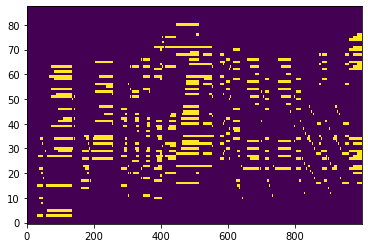

In [51]:
roll = notes_to_piano_roll(total_notes_w_pedal)
plt.imshow(roll[:, :1000])

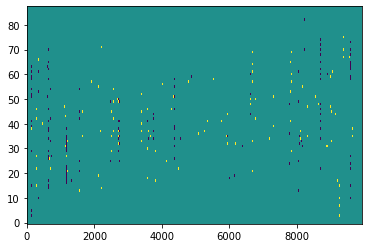

In [53]:
plt.imshow(roll.diff(dim=-1))

## Dataset

In [7]:
from tqdm.auto import tqdm

class MaestroSet:
  def __init__(self, data_dir, csv_name='small_maestro.csv', split='train', sr=16000):
    self.dir = Path(data_dir)
    self.meta = pd.read_csv(self.dir / csv_name)
    self.meta = self.meta.loc[self.meta['split']==split]
    self.sr = 16000
    self._load_data()

  def _load_data(self):
    self.audio = []
    self.roll = [] 
    for i, row in tqdm(self.meta.iterrows()):
      audio_name = self.dir / row['audio_filename']
      midi_name = self.dir / row['midi_filename']
      
      audio = torch.load(audio_name.with_suffix('.pt'))
      mido_obj = MidiFile(midi_name)
      roll = notes_to_piano_roll(parse_note_from_mido_w_pedal(mido_obj))
      
      self.audio.append(audio)
      self.roll.append(roll)
    
       
  def __len__(self):
    return len(self.meta)
  
  def __getitem__(self, idx):
    audio = self.audio[idx]
    roll = self.roll[idx]
    left = random.randint(0, len(audio)-self.sr*25-1)
    right = left + self.sr * 20
    sliced_audio = audio[left:right]

    left_roll = time2frame(left/self.sr)
    right_roll = left_roll + int(20 * self.sr/512)
    sliced_roll = roll[:, left_roll:right_roll]
    return sliced_audio, sliced_roll
  
trainset = MaestroSet(data_dir)
trainset[0]

0it [00:00, ?it/s]

NameError: name 'random' is not defined

In [115]:
trainset[0][0].shape

torch.Size([320000])

In [9]:
validset = MaestroSet(data_dir, split='validation')
testset = MaestroSet(data_dir, split='test')



0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [11]:
import random

In [12]:
from torch.utils.data import DataLoader

train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=0)
test_loader = DataLoader(testset, batch_size=10, num_workers=0)


batch = next(iter(train_loader))

In [124]:
batch[0].shape, batch[1].shape

(torch.Size([8, 320000]), torch.Size([8, 88, 625]))

In [127]:
ipd.Audio(batch[0][4], rate=16000)

In [101]:
def pitch2hz(pitch):
  return 2 ** ((pitch-69)/12) * 440
pitch2hz(108)

4186.009044809578

In [106]:
16000 * 32 / 1000

512.0

In [109]:
20 * 16000 / 512

625.0

In [13]:

class Model(nn.Module):
  def __init__(self, hidden_size=256):
    super().__init__()
    
    self.mel_converter = torchaudio.transforms.MelSpectrogram(sample_rate=16000,
                                                            n_fft = 2048,
                                                            hop_length = 512,
                                                            f_min = 20,
                                                            f_max = 8000,
                                                            n_mels = 88 * 4,
                                                           )
    self.rnn = nn.GRU(88*4, hidden_size, num_layers=3, bidirectional=True, batch_first=True)
    self.projection = nn.Linear(hidden_size * 2, 88)
    
    
    
  def forward(self, x):
    mel_spec = self.mel_converter(x) # batch size x num mels x time
    hidden_out, last_hidden = self.rnn(mel_spec.permute(0, 2, 1))
    logit = self.projection(hidden_out)
    prob = torch.sigmoid(logit)
    return prob.permute(0,2,1)
  
model = Model()
out = model(batch[0])
out.shape, batch[1].shape

(torch.Size([8, 88, 626]), torch.Size([8, 88, 625]))

In [27]:
class CNNModel(Model):
  def __init__(self, hidden_size=256):
    super().__init__(hidden_size)
    
    self.cnn = nn.Sequential(nn.Conv2d(1, hidden_size//4, kernel_size=(3,3), padding=1),
                             nn.BatchNorm2d(hidden_size//4),
                             nn.MaxPool2d((2,1)) ,
                             nn.ReLU(),
                             nn.Conv2d(hidden_size//4, hidden_size//2, kernel_size=(3,3), padding=1),
                             nn.BatchNorm2d(hidden_size//2),
                             nn.MaxPool2d((2,1)) ,
                             nn.ReLU(),
                             nn.Conv2d(hidden_size//2, hidden_size, kernel_size=(3,3), padding=1),
                             nn.BatchNorm2d(hidden_size),
                             nn.ReLU(),)
    self.fc = nn.Linear(88 * hidden_size, 88)
    
#     self.rnn = nn.GRU(hidden_size, hidden_size, num_layers=3, bidirectional=True, batch_first=True)
#     self.projection = (hidden_size, 88)
  def forward(self, x):
    mel_spec = self.mel_converter(x) # batch size x num mels x time
    mel_spec = mel_spec.unsqueeze(1) # batch_size x 1 x num_mels x time
    conv_out = self.cnn(mel_spec)
    conv_out = conv_out.reshape(x.shape[0], -1, mel_spec.shape[-1])
    
    fc_out = self.fc(conv_out.permute(0,2,1))
#     hidden_out, last_hidden = self.rnn(fc_out)
#     logit = self.projection(fc_out)
    prob = torch.sigmoid(fc_out)
    return prob.permute(0,2,1)
  
conv_model = CNNModel()
conv_model.to('cuda')
conv_model(batch[0].to('cuda')).shape

torch.Size([10, 88, 626])

In [20]:
def get_binary_cross_entropy_loss(pred, target, eps=1e-7):
  return -(target * torch.log(pred+eps) + (1-target) * torch.log((1-pred)+eps)).mean()
get_binary_cross_entropy_loss(out[...,:-1], batch[1])

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [33]:
model = CNNModel()
optimizer = torch.optim.Adam(model.parameters())
device = 'cuda'
model.to(device)
model.train()

num_epochs = 100

loss_record = []
test_loss = []
for epoch in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    audio, roll = batch
    out = model(audio.to(device))
    loss = get_binary_cross_entropy_loss(out[...,:-1], roll.to(device))
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())
  model.eval()
  with torch.no_grad():
    for batch in test_loader:
      audio, roll = batch
      out = model(audio.to(device))
      loss = get_binary_cross_entropy_loss(out[...,:-1], roll.to(device))
      test_loss.append(loss.item())
      
  model.train()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

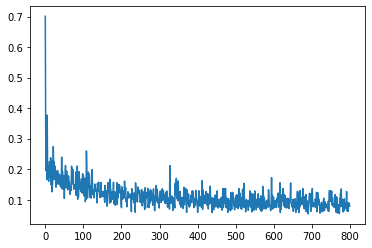

In [34]:
plt.plot(loss_record)

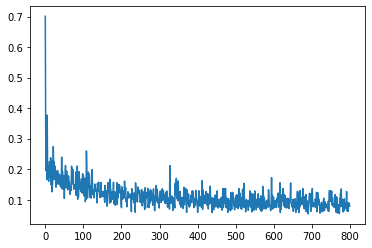

In [35]:
plt.plot(loss_record)

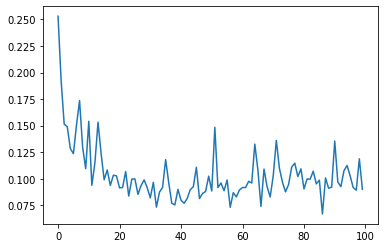

In [36]:
plt.plot(test_loss)

In [24]:
out[0].shape

torch.Size([88, 626])

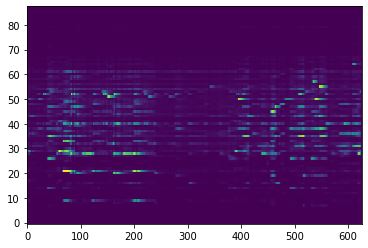

In [37]:
plt.imshow(out[2].cpu())

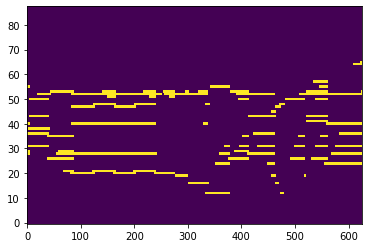

In [38]:
plt.imshow(roll[2])

In [137]:
from torch.nn import BCELoss
bce_loss = BCELoss

roll_length = batch[1].shape[-1]
bce_loss(out[...,:roll_length], batch[1])

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [96]:
??torchaudio.transforms.MelSpectrogram

6539 7164


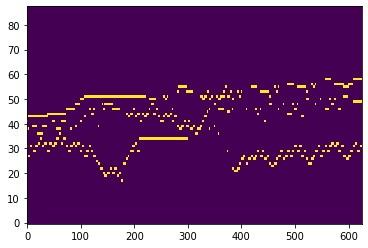

In [85]:
import random
audio = trainset.audio[0]
roll = trainset.roll[0]
left = random.randint(0, len(audio)-16000*20-1)
# left = 16000 * 10
# left=0
right = left + 16000 * 20

left_roll = time2frame(left/16000)
right_roll = time2frame(right/16000)
print(left_roll, right_roll)
sliced_roll = roll[:, left_roll:right_roll]

ipd.display(ipd.Audio(audio[left:right], rate=16000))
plt.imshow(sliced_roll)

In [70]:
len(audio), 16000*20

(4152701, 320000)

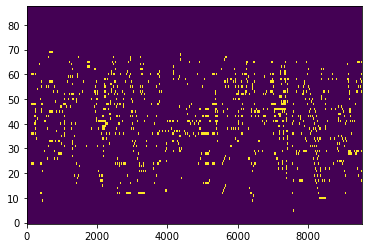

In [66]:
plt.imshow(trainset.roll[40])